**EMPLOYEE BURNOUT ANALYSIS**

In today’s fast-paced corporate world, employee burnout has become a silent productivity killer, eroding morale and stifling innovation. Despite its widespread impact, organizations often struggle to detect and address burnout before it spirals out of control. This project aims to leverage data-driven insights and predictive modeling to analyze and forecast burnout risks, enabling organizations to proactively address the root causes. By developing targeted interventions and fostering a culture of well-being, this initiative seeks to promote a healthier work environment, enhance employee engagement, and ultimately drive organizational success.




In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVR, SVR

**Loading Dataset**

In [2]:
data=pd.read_excel('/content/employee_burnout_analysis-AI 2.xlsx')

In [3]:
data.head(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,Female,Service,Yes,2,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3,6.0,NaN,0.67


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [6]:
data.shape

(22750, 9)

In [7]:
data.columns.to_list()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [11]:
data.isnull()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
22745,False,False,False,False,False,False,False,True,False
22746,False,False,False,False,False,False,False,False,False
22747,False,False,False,False,False,False,False,True,False
22748,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [13]:
data.isnull().sum().values.sum()

4622

**Exploratory Data Analysis**

In [14]:
data = data.dropna()

In [15]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [16]:
data=data.drop("Employee ID",axis=1)

In [17]:
data.corr(numeric_only=True)["Burn Rate"][:-1]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389


Data Visualization


In [18]:
import calendar

Minimum Date 2008-01-01 00:00:00
Maximum Date 2008-12-31 00:00:00


<Axes: title={'center': 'Hired Employees Per Month'}, xlabel='Month', ylabel='Hired Employees'>

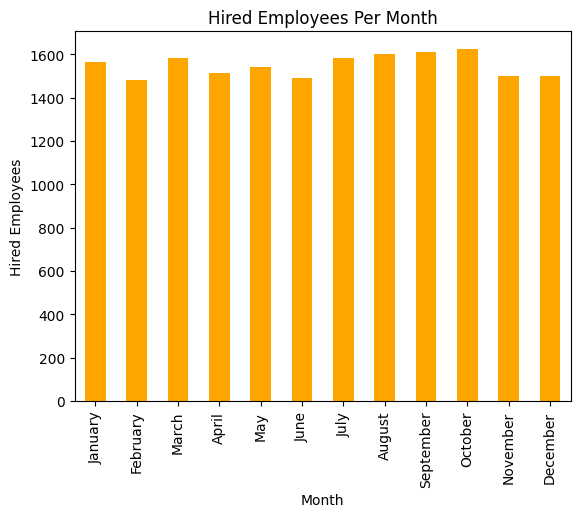

In [19]:
print(f"Minimum Date {data['Date of Joining'].min()}")
print(f"Maximum Date {data['Date of Joining'].max()}")
data_month = data.copy()
data_month["Date of Joining"]=data_month["Date of Joining"].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month["Date of Joining"].dt.month).count().rename(index=lambda x: calendar.month_name[x]).plot(kind="bar",xlabel="Month"
,ylabel="Hired Employees",color = "Orange" ,title="Hired Employees Per Month")

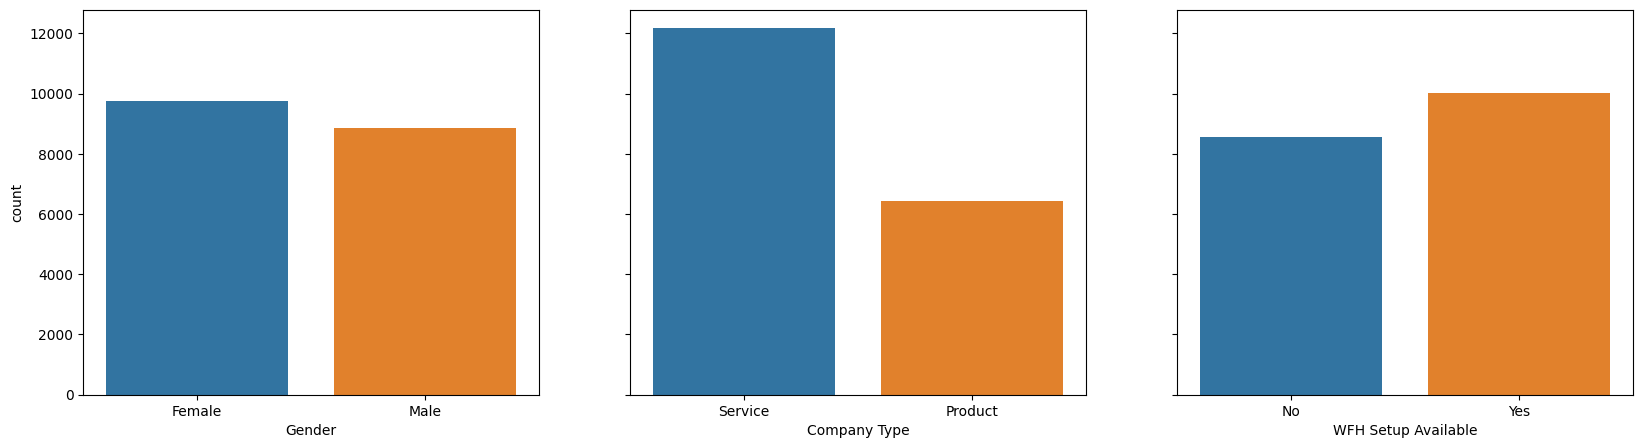

In [20]:
cat_columns = data.select_dtypes(include='object').columns
fig, ax = plt.subplots(1, len(cat_columns), sharey=True, figsize=(20, 5))

for i, c in enumerate(cat_columns):
    sns.countplot(data=data, x=c, hue=c, ax=ax[i], legend=False)

plt.show()


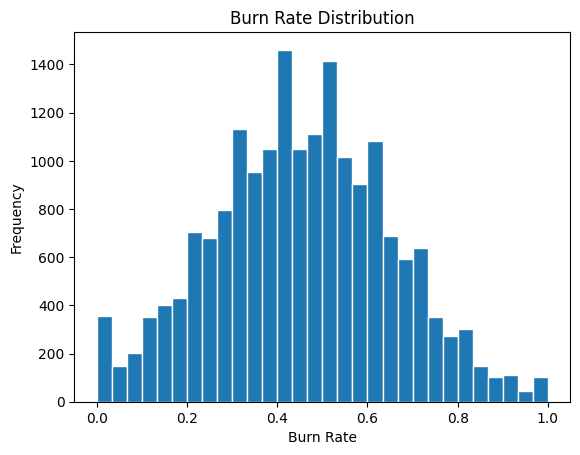

In [21]:
burn_st = data.select_dtypes(include=[int, float])
plt.hist(burn_st["Burn Rate"], bins=30, edgecolor='White')
plt.title("Burn Rate Distribution")
plt.xlabel("Burn Rate")
plt.ylabel("Frequency")
plt.show()

In [22]:
data_encoded = pd.get_dummies(data, columns=["Company Type","WFH Setup Available","Gender"],drop_first=True)
data_encoded.head()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2008-09-30,2,3.0,3.8,0.16,True,False,False
1,2008-11-30,1,2.0,5.0,0.36,True,True,True
3,2008-11-03,1,1.0,2.6,0.20,True,True,True
4,2008-07-24,3,7.0,6.9,0.52,True,False,False
5,2008-11-26,2,4.0,3.6,0.29,False,True,True


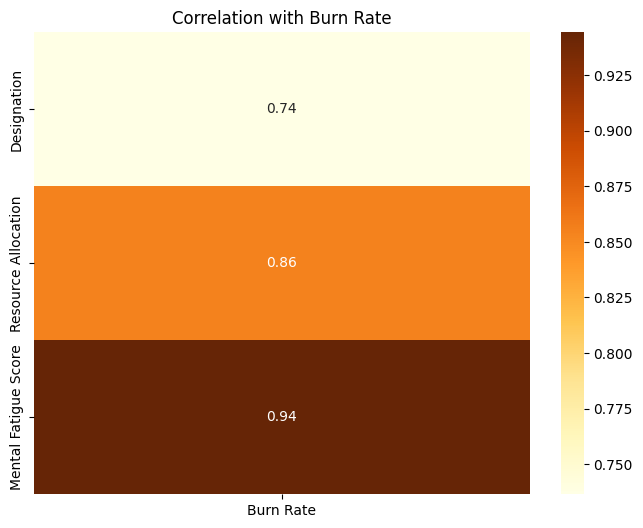

(<Axes: title={'center': 'Correlation with Burn Rate'}>,
 Text(0.5, 1.0, 'Correlation with Burn Rate'),
 None)

In [23]:
#Plotting the Heat Map to check the correlation
correlation_with_burn_rate = data.corr(numeric_only=True)["Burn Rate"].drop("Burn Rate")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_burn_rate.to_frame(), annot=True, cmap="YlOrBr", cbar=True), plt.title("Correlation with Burn Rate") ,plt.show()

In [24]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data["Date of Joining"].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [25]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Days
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,273
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,334
3,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,307
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,205
5,2008-11-26,Male,Product,Yes,2,4.0,3.6,0.29,330


In [26]:
numeric_data = data.select_dtypes(include="number")
correlation = numeric_data.corr()["Burn Rate"]
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [27]:
data = data.drop(["Date of Joining" , "Days"], axis = 1)
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


In [28]:
if all(col in data.columns for col in ['Company Type','WFH Setup Available','Gender']):
     data = pd.get_dummies(data, columns=["Company Type","WFH Setup Available","Gender"],drop_first=True)
     data.head()
     encoded_columns = data.columns
else:
  print("Error: One or more of the specified columns are not present in the DataFrame.")
  print(data.columns)

In [29]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,False,True,False
22744,3,7.0,6.2,0.54,False,False,True
22746,3,6.0,6.7,0.59,False,True,False
22748,2,5.0,5.9,0.52,True,False,False


**Preprocessing**

In [30]:
y = data['Burn Rate']
X = data.drop('Burn Rate',axis=1)

In [31]:
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, shuffle=True,random_state=1)

scaler = StandardScaler()
scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [32]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
8977,0.723327,0.250185,-0.061773,0.724706,-1.082297,1.051505
14115,-0.159330,0.250185,-0.941481,0.724706,-1.082297,-0.951018
8797,0.723327,0.250185,0.973179,0.724706,-1.082297,-0.951018
1173,-1.041987,-1.214568,-0.579248,-1.379869,-1.082297,-0.951018
1941,-0.159330,0.738436,1.180169,-1.379869,0.923961,1.051505
...,...,...,...,...,...,...
13453,0.723327,1.226687,1.645897,-1.379869,0.923961,-0.951018
21179,0.723327,0.250185,-1.044976,0.724706,0.923961,1.051505
6327,0.723327,0.250185,0.093470,0.724706,-1.082297,1.051505
14933,-0.159330,0.250185,0.714441,0.724706,-1.082297,1.051505


In [33]:
y_train

,Burn Rate
8977,0.41
14115,0.34
8797,0.61
1173,0.35
1941,0.61
...,...
13453,0.78
21179,0.30
6327,0.42
14933,0.54


**Linear Regression()**

In [34]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [35]:
print("Linear Regression Model Performance Matrices:\n")

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

rmse = mse ** 0.5
print("Root Mean Squared Error:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

r2 = r2_score(y_test,y_pred)
print("R-squared Score:",r2)

Linear Regression Model Performance Matrices:

Mean Squared Error: 0.0031569779113610717
Root Mean Squared Error: 0.0561869905882231
Mean Absolute Error: 0.04595032032644773
R-squared Score: 0.918822674247248


**LinearSVR(max_iter=10000)**

In [40]:
SVMLinear = LinearSVR(dual='auto', max_iter=10000)
SVMLinear.fit(X_train, y_train)

LinearSVR(max_iter=10000)

In [43]:
print("Support Vector Machine (Linear Kernel) Performance Metrics\n")

y_pred = SVMLinear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse =  mse ** 0.5
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Support Vector Machine (Linear Kernel) Performance Metrics

Mean Squared Error: 0.0031997664850474373
Root Mean Squared Error: 0.05656647845718732
Mean Absolute Error: 0.0459134989469941
R-squared Score: 0.9177224251855952


In [44]:
SVMRbf = SVR()
SVMRbf.fit(X_train, y_train)

SVR()

In [47]:
print("Support Vector Machine (RBF Kernel) Performance Metrics\n")

y_pred = SVMRbf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Support Vector Machine (RBF Kernel) Performance Metrics

Mean Squared Error: 0.00341204574122986
Root Mean Squared Error: 0.058412719002199
Mean Absolute Error: 0.04962241383880883
R-squared Score: 0.9122639573681112
